# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [552]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [553]:
# Importing data as a Pandas DataFrame called temps.
temps= pd.read_csv('human_body_temperature.csv')
print(temps)

     temperature gender  heart_rate
0           99.3      F        68.0
1           98.4      F        81.0
2           97.8      M        73.0
3           99.2      F        66.0
4           98.0      F        73.0
5           99.2      M        83.0
6           98.0      M        71.0
7           98.8      M        78.0
8           98.4      F        84.0
9           98.6      F        86.0
10          98.8      F        89.0
11          96.7      F        62.0
12          98.2      M        72.0
13          98.7      F        79.0
14          97.8      F        77.0
15          98.8      F        83.0
16          98.3      F        79.0
17          98.2      M        64.0
18          97.2      F        68.0
19          99.4      M        70.0
20          98.3      F        78.0
21          98.2      M        71.0
22          98.6      M        70.0
23          98.4      M        68.0
24          97.8      M        65.0
25          98.0      F        87.0
26          97.8      F     

Loading data into a pandas dataframe, temps

In [554]:
#Using the columns temperature and gender to get the DataFrame into desired data and  called it df2.
df2= temps[['temperature','gender']]
print(df2)


     temperature gender
0           99.3      F
1           98.4      F
2           97.8      M
3           99.2      F
4           98.0      F
5           99.2      M
6           98.0      M
7           98.8      M
8           98.4      F
9           98.6      F
10          98.8      F
11          96.7      F
12          98.2      M
13          98.7      F
14          97.8      F
15          98.8      F
16          98.3      F
17          98.2      M
18          97.2      F
19          99.4      M
20          98.3      F
21          98.2      M
22          98.6      M
23          98.4      M
24          97.8      M
25          98.0      F
26          97.8      F
27          98.2      F
28          98.4      F
29          98.1      M
..           ...    ...
100         99.0      M
101         98.5      M
102         98.0      F
103         99.4      F
104         97.6      M
105         96.7      M
106         97.0      M
107         98.6      M
108         98.7      F
109         97.3

In [555]:
#Wrote a function, ECDF to verify the distribution of the data.
def ecdf(data):
    #calculating the ecdf 
    n=len(data)
    x=np.sort(data)
    y= np.arange(1, n+1)/n
    
    return x, y

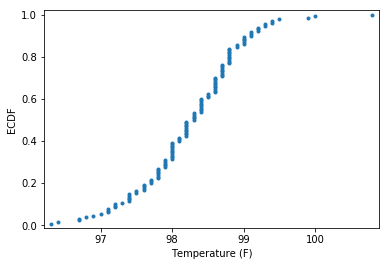

In [556]:
#plotted the data using ECDF function
x,y=ecdf(df2['temperature'])
plt.plot(x,y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.show()

In [557]:
# Calculating the mean and the std of dataframe df2
mu= df2.temperature.mean()
print(ob_mean)
su= df2.temperature.std()
print(ob_std)

98.24923076923078
0.7303577789050377


In [558]:
# Calculated the z score from df2
zscore=(mu-98.6)/(su/np.sqrt(130))
print(zscore)

-5.45482329236


In [559]:
#Calculated the ttest and p value for the data
stats.ttest_1samp(df2['temperature'], 98.6)                   

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [560]:
# Took a random sample of 10 data points in the df2 called it rand
rand= np.random.normal(mu, su, size=10)
print(rand)

[ 98.98250627  98.54795941  99.04288573  97.64381979  98.72818696
  98.91549194  97.49022527  98.94942923  99.42618406  99.42216278]


In [561]:
#Calculated mean and std for rand
x=np.mean(rand)
y=np.std(rand)
print(x , y)

98.7148851456 0.628940475117


In [562]:
#calculated the z score for rand
zscore2=(x-98.6)/(y/np.sqrt(10))
print (zscore2)

0.577636110011


In [563]:
#Calculated t score for rand
stats.ttest_1samp(rand, 98.6)

Ttest_1sampResult(statistic=0.54799372991842743, pvalue=0.59702341908036949)

In [564]:
stats.sem(df2['temperature'])

0.064304416837891024

In [565]:
error= su/np.sqrt(130)
inter=1.96*error
print(inter)

0.126036657002


In [566]:
min= mu-inter
max= mu+inter
print(min, max)

98.1231941122 98.3752674262


In [567]:
male= df2[df2.gender =='M']
female=df2[df2.gender =='F']
print(male, female)

     temperature gender
2           97.8      M
5           99.2      M
6           98.0      M
7           98.8      M
12          98.2      M
17          98.2      M
19          99.4      M
21          98.2      M
22          98.6      M
23          98.4      M
24          97.8      M
29          98.1      M
30          98.3      M
32          98.5      M
33          98.6      M
34          99.3      M
35          99.5      M
36          99.1      M
37          98.3      M
41          98.4      M
42          96.9      M
43          97.2      M
46          97.4      M
47          97.4      M
48          97.9      M
49          97.1      M
53          98.6      M
57          98.2      M
59          97.6      M
61          98.4      M
..           ...    ...
73          98.8      M
74          99.0      M
75          98.8      M
77          98.4      M
78          97.4      M
79          97.6      M
81          98.0      M
82          97.5      M
85          97.1      M
87          98.0

In [568]:
mum= np.mean(male['temperature'])
print(mum)

98.1046153846154


In [569]:
fum=np.mean(female['temperature'])
print(fum)

98.39384615384613


In [570]:
#Difference in the means: males and females
diff= mum-fum
print(diff)the

-0.289230769230727


In [571]:
# Variance of both groups applied to the difference in means to calculate the standard deviation
v=(male['temperature'].var()/len(male)) + (female['temperature'].var()/len(female))
d= np.sqrt(v)
con= -1.96*d
print(con)

-0.248045742823


In [ ]:
1. The distribution of the data seems to be normal after calculating the ECDF and the shape of the cure looking like a normal distribution curve.
2. The sample size is large and the observations are independent because each data point is a seperate individual.
3. A z score would be the best test to use because the data is larger than 30. The z score turns out to be -5.45 which is the same value for the t test. The ideal type of test would be a one-sample test because we have a population mean of 98.6 a calculated experimental mean of 98.3. The data would need to be presented using two groups in order to run a two-sample test.
4. The sample size of 10 is ideal for a t test which is used for sample sizes under 30. the t test had a value of 0.55 and a z score of 0.58. This differs from our other scores which were the same. 
5. Abnormal temperatures would be any that are under 98.12.
6. There seems to be a statistically significant difference between the male and female groups. After apllying the variance and then calculating the standard deviation we can calcualte the 95% confidence level of the difference in means of -0.248. Our measured value was -0.290 meaning the chances of getting a diffeence in means under our 5% mark meaning it is statistically significant.

     For over a hundred years medical professions believed that individuals would have a normal body temperature of 98.6 degrees F. The data we decided to work with was of 130 individuals with an equal number of males and females. We wanted to test that there was no statistical difference between the assumed value of 98.6 degrees F and our calculated value of 98.3 degrees F. After examining the data and using statistical testing we have determined that there in fact is a statistical difference between the two values. In addition we also determined that there is a statistical difference between males and females we measured.